In [49]:
import yfinance as yf

In [50]:
# Define the ticker symbol and the date range
ticker = "INTC"
start_date = "2010-01-01"
end_date = "2024-09-19"

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,20.790001,21.030001,20.730000,20.879999,13.519427,47800900
2010-01-05,20.940001,20.990000,20.600000,20.870001,13.512954,52357700
2010-01-06,20.809999,20.930000,20.670000,20.799999,13.467634,40037400
2010-01-07,20.730000,20.760000,20.340000,20.600000,13.338136,54041500
2010-01-08,20.540001,20.889999,20.400000,20.830000,13.487054,48234700
...,...,...,...,...,...,...
2024-09-12,19.430000,19.540001,19.040001,19.360001,19.360001,51602900
2024-09-13,19.490000,19.799999,19.490000,19.660000,19.660000,44236300
2024-09-16,20.030001,21.070000,19.760000,20.910000,20.910000,149337000


<Axes: >

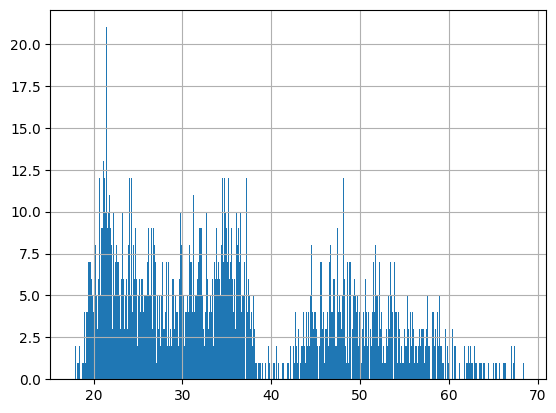

In [51]:
data["Close"].hist(bins=1000)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
X = data["Close"][:-1].values.reshape(-1, 1)
y = data["Close"][1:].values

X.shape, y.shape

((3701, 1), (3701,))

In [66]:
X_train, X_test = X[: int(len(X) * 0.8)], X[int(len(X) * 0.8) :]
y_train, y_test = y[: int(len(y) * 0.8)], y[int(len(y) * 0.8) :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2960, 1), (741, 1), (2960,), (741,))

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
X_test

array([[53.97999954],
       [54.18000031],
       [53.81000137],
       [53.43999863],
       [52.16999817],
       [52.25999832],
       [53.90000153],
       [54.45999908],
       [54.47000122],
       [55.20999908],
       [55.36999893],
       [56.        ],
       [49.45999908],
       [49.40999985],
       [48.27999878],
       [47.88999939],
       [48.08000183],
       [49.        ],
       [49.54999924],
       [49.86000061],
       [50.38999939],
       [50.31000137],
       [50.91999817],
       [51.54999924],
       [51.20000076],
       [50.75999832],
       [50.52999878],
       [50.31000137],
       [50.31999969],
       [50.61000061],
       [50.22999954],
       [49.68000031],
       [49.52000046],
       [49.83000183],
       [49.09999847],
       [49.75999832],
       [48.77999878],
       [50.        ],
       [49.20000076],
       [48.59999847],
       [49.5       ],
       [49.25      ],
       [50.99000168],
       [52.56999969],
       [51.75      ],
       [50

In [77]:
y_pred = model.predict(X_test)

In [83]:
y_pred = []
last_data = X_test[0].reshape(1, 6)

for i in range(y_test.shape[0]):
    last_data = model.predict(last_data)
    y_pred.append(last_data)

y_pred = np.array(y_pred).reshape(-1, 6)
y_pred.shape

[[53.97999954]]
[53.96001646]


ValueError: Expected 2D array, got 1D array instead:
array=[53.96001646].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
y_pred

array([53.96001646, 54.15967033, 53.79031315, 53.42095217, 52.1531545 ,
       52.24299855, 53.8801572 , 54.43918346, 54.44916825, 55.1878826 ,
       55.34760493, 55.97651327, 49.44785585, 49.39794333, 48.26990223,
       47.88057929, 48.07025217, 48.98865462, 49.5376999 , 49.84716358,
       50.37624309, 50.29638383, 50.9053226 , 51.53423094, 51.18483953,
       50.74560027, 50.51599965, 50.29638383, 50.30636481, 50.59586272,
       50.21652076, 49.66747548, 49.50775315, 49.81721683, 49.08847965,
       49.74733474, 48.76903499, 49.98692015, 49.18830849, 48.58934689,
       49.48778738, 49.238221  , 50.97520469, 52.55246223, 51.73388481,
       50.46608714, 50.57589696, 49.98692015, 49.68744125, 50.65575622,
       50.81548236, 50.6058437 , 49.58761241, 50.75558505, 50.95523892,
       51.29464935, 51.92355389, 51.74386579, 51.81374788, 51.72390383,
       51.48431843, 53.19135156, 53.12147327, 53.85020665, 53.98996321,
       53.42095217, 55.1878826 , 55.88666923, 55.71696591, 54.91

In [57]:
# Import RMSE and MAPE
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Calculate RMSE and MAPE
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 0.9631104978337198
MAPE: 0.018865553148532953
